## Sklearn Pre-processing
- **preprocessing**
- Encodage (qualitative->numérique)
- Normalisation (meme echelle, quantitative data)
- **imput**
- Imputation ( remplacer les donnée manquant -> val. statistique.
- **feature_selection**
- Selection de variable (test statis. pour select les var. les plus utile)
- **feature_extraction**
- extraction: genereration de nouvelle variable

In [15]:
#preprocessing
#preprocessing.Binarizer (majuscule)=> classe transformer
import numpy as np
from sklearn.preprocessing import LabelEncoder, LabelBinarizer 

In [8]:
#fit_transform(X) categorie->numerique
#X_test->[transformer + estimator = PIPELINE]-> y_pred
X = np.array(['chat','chien','chat','oiseau'])
transf = LabelEncoder()
transf.fit_transform(X)

array([0, 1, 0, 2], dtype=int64)

In [20]:
#Tranformer d'encodage (qualitative->numérique)
#Encod. ordinal: categorie -> une valeur décimal (LabelEncoder (1colonne) ,OrdinalEncoder)
#encoder.inverse_transform(np.array([0,0,2,2]))->[chat,chat,...]
#encod. One-Hot (LabelBinarizer) 
oneHot= LabelBinarizer()
oneHot.fit_transform(X)
#sparse Matrix [0 et 1]
#values = [a,b,c]
#rows   = [0,1,3]
#cols   = [0,2,4]

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

## Normalisation
- normalisé les donnée avant passage machine
- MinMaxScaler (val. entre 0 et 1) inverse_transform


In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [27]:
X = np.array([[70],[80],[120]])
scaler = MinMaxScaler()
scaler.fit_transform(X) #transform_fit pour X

array([[0. ],
       [0.2],
       [1. ]])

In [29]:
y = np.array([[90]])
scaler.transform(y) #transform pour y

array([[0.4]])

In [41]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

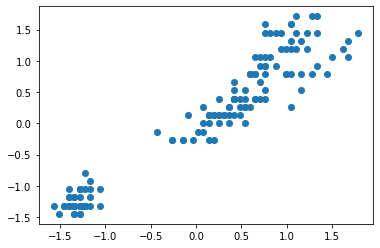

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


In [57]:
iris = load_iris()
X = iris.data

MinMax = StandardScaler()
X = MinMax.fit_transform(X)

plt.scatter(X[:,2],X[:,3])
plt.show()
print(np.mean(X,axis=0))

### StandardScaler 
(chaque var. : moyenne = 0 et Ecart_type=1)


### RobustScaler
normalisation peu sensible aux "outliers"

### polynomiale features (creation de var. polyno.)
- feature Engineering
- 1, x^1, x²,...

### PowerTransform (trans non-lineaire)
transformation plus "normal" et gaussienne

### Discretisation (Binarizer): création de catégorie


## Pipeline

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [63]:
iris = load_iris()
X = iris.data
y = iris.target

In [68]:
# maniere :CLASSIQUE
#split
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Transformer
scaler = StandardScaler()#normalisation
X_train_transformed = scaler.fit_transform(X_train)

#Estimateur
model= SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train) #entrainement

#Test
X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([0, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2])

In [69]:
#Plus simple
#Transformer+Estimator = ESTIMATEUR COMPOSITE
from sklearn.pipeline import make_pipeline

In [72]:
model = make_pipeline(StandardScaler(), SGDClassifier())
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
model.predict(X_test)

0.9736842105263158


array([0, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2])

### méthode ULTIME
- définir pipline
- définir cross_validation (nombre de split)
- définir Dictionnaire "params" à optimisation


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [86]:
model = make_pipeline(PolynomialFeatures(),
                     StandardScaler(),
                     SGDClassifier(random_state=0))
params = {
    'polynomialfeatures__degree':[2,3,4]
}

grid = GridSearchCV(model, param_grid=params, cv=4)
grid.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4]})

In [87]:
grid.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [89]:
grid.score(X_test,y_test)# VS 0.84 sans preprocessing

0.9736842105263158

## Pipeline avancé
- make_column_transformer (transformer que pour certaine colonne)
- make_column_selector( selection des colonne "numerique" ou pas)
- make_union (pipelin parallele)

In [113]:
import seaborn as sns
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [101]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [102]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [114]:
#trie: var. CATEGORIEL vs var. NUMERIQUE
numerical_feature = make_column_selector(dtype_include=np.number)#['pclass','age','fare']
categorical_features = make_column_selector(dtype_exclude=np.number)#['sex','deck','alone']
#definir pipeline
numerical_pipeline = make_pipeline(SimpleImputer(),StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())
#transformer
preprocesseur = make_column_transformer((numerical_pipeline, numerical_feature),(categorical_pipeline,categorical_features))

In [115]:
model = make_pipeline(preprocesseur,SGDClassifier())
model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017A53A31250>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEn

conda update --all

## Sklearn IMPUTER : Nettoyage de données

In [116]:
from sklearn.impute import SimpleImputer
X = np.array([[10,3],
              [0,4],
              [5,3],
              [np.nan,3]])

In [119]:
#remplacer np.nan par la moyenne
imputer = SimpleImputer(missing_values=np.nan,
                       strategy='mean')
imputer.fit_transform(X)

array([[10.,  3.],
       [ 0.,  4.],
       [ 5.,  3.],
       [ 5.,  3.]])

In [122]:
#KNNImputer
#remplace par les valeurs des plus proche voisin (la valeur la plus "ressemblante")
from sklearn.impute import KNNImputer
A = np.array([[10,3],
              [0,4],
              [5,3],
              [np.nan,3]])

In [123]:
imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(X)

array([[10.,  3.],
       [ 0.,  4.],
       [ 5.,  3.],
       [10.,  3.]])

In [124]:
#MissingIndicator : indique l'absence de valeur (booelean array)

In [125]:
#exercice de synthese
titanic = sns.load_dataset('titanic')
X = titanic[['pclass','age']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y)


In [126]:
model = make_pipeline(KNNImputer(),SGDClassifier())

In [127]:
params = {
    'knnimputer__n_neighbors' : [1,2,3,4]
}

In [128]:
grid = GridSearchCV(model,param_grid=params,cv=5)

In [130]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'knnimputer__n_neighbors': [1, 2, 3, 4]})

In [131]:
grid.best_params_

{'knnimputer__n_neighbors': 2}

In [135]:
grid.score(X_test,y_test)

0.672645739910314

## Feature Selection (selectionne les variable les plus utile)

- VarianceThreshold (elimine les variable dont la variance est < a un certain seuil)
- SelectKBest(Chi2,k=1) : Selectionne les variable avec score de test le plus elevé avec **y** 
- SelectFromModel (entraine un estimateur, selectionne les var. les plus importante)
- La matrice coefficients
- RFE + RFECV

In [137]:
#varianceThreshold (elimine les variable dont la variance est < a un certain seuil)
